In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# fig = plt.figure() 
# # create figure window

# gs = gridspec.GridSpec(50, 50)
# # Creates grid 'gs' of a rows and b columns 


def load_data(dataset, country_list):
    """
    This function takes in a csv file and a list of countries that are of
    interest. Returns two dataframes one with the years as columns and the
    other country names as columns.

    Parameters
    ----------
    dataset : .csv file
    country_list : List
    """
    # skipping first 4 rows, as they contain non essential data.
    world_bank_df = pd.read_csv(dataset, skiprows=4)

    # Removing non essential data.
    world_bank_df.drop(['Country Code', 'Indicator Code', 'Unnamed: 67'],
                       axis=1, inplace=True)

    # subsetting the dataframe to get data for countries we are interested in.
    world_bank_df = world_bank_df[
        world_bank_df['Country Name'].isin(country_list)]

    # Setting index before transposing the dataframe
    temp_df = world_bank_df.set_index('Country Name')

    return world_bank_df, temp_df.T


def generate_line_plot(data, countries, indicator, xlabel, ylabel, title):
    """
    This function generates line plots for the given dataframe for a particular
    indicator in the world bank dataset. It also requires a list of country
    names.
    Parameters
    ----------
    data : TYPE
    countries : TYPE
    indicator : TYPE
    xlabel : TYPE
    ylabel : TYPE
    title : TYPE

    Returns None.

    """
    
    # Specifying figure size, as plot is big
#     plt.figure(figsize=(15, 8))

    # Iterating over the list of countries
    for country in countries:
        temp_df = data[country].T
        # Subsetting the transposed df. Which now has years as columns
        subset_df = temp_df[temp_df['Indicator Name'] == indicator]
        # Transposing the df again to makes years the index.
        subset_df = subset_df.T

        # Plotting using the subset df.
        # Plotting using for loop to include line plots of every country
        # in the same figure.
        
        plt.plot(subset_df[1:], label=country)

        # Labelling
        plt.xticks(rotation=90)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend()

    # Saving the figure.
#     plt.savefig('figures/line_graph_'+indicator+'.png',
#                 bbox_inches='tight',
#                 dpi=200)
#      plt.show()

    return 


def generate_pie_chart(data, year, countries, indicator, title):
    """
    Creates a pie chart for the specified year. Uses the dataframe plot
    function create a pie chart for a list of countries
    and a specific indicator.

    Parameters
    ----------
    data : Pandas DataFrame
    year : String
    countries : List
    indicator : string

    Returns None

    """
    # Creating an  empty Dataframe to store the specified indicator values for
    # each country.
    result = pd.DataFrame()

    # Iterating through the list of countries
    for country in countries:
        # Transposing the dataframe to be able to extract indicator values
        temp_df = data[country].T
        subset_df = temp_df[temp_df['Indicator Name'] == indicator]

        # Transposing the subset to make the years rows from columns.
        subset_df = subset_df.T

        # Creating a new column in the result df and add the current country's
        # indicator value, i.e the subset_df
        result[country] = subset_df

    # Since the dataframe contains values of only one indicator value and
    # only country name is needed, dropping the first row with indicator name.
    result = result.drop(['Indicator Name'], axis=0)

    # Selecting a particular year for the pie chart.
    result = result.loc[str(year)]
#     plt.figure()

    # Plotting pie chart using the df.plot method
    result.plot(kind='pie', subplots=True, autopct="%1.f%%", ylabel="")

    # using arguments passed while calling funtion to create title.
    plt.title(title+" in "+str(year))

    # Saving the pie chart.
#     plt.savefig("figures/pie_chart_"+title+".png",
#                 bbox_inches='tight',
#                 dpi=200)
#     plt.show()

    return

def generate_bar_plot(data, year, indicator, image_name, title):
    """
    This function generates a bar plot of the Population growth (annual %)
    for the countries specified in the country_list variable. For a given year

    Returns None.
    """

    # Extracting only the selected indicator's data
    subset_data = data[
        data['Indicator Name'] == indicator]
    
#     plt.figure()

    # Passing X-axis as country names and Y-axis is all rows,
    # in the specified year. Here year is a column name
    plt.bar(subset_data['Country Name'],
            subset_data.loc[:, str(year)])

    # labelling
    plt.xlabel("Country")
    plt.ylabel("%")
    plt.xticks(rotation=20)
    plt.title(title)

    # Saving the generatad plot
#     plt.savefig('figures/barplot'+image_name+'.png',
#                 bbox_inches='tight',
#                 dpi=200)

#     plt.show()

    return

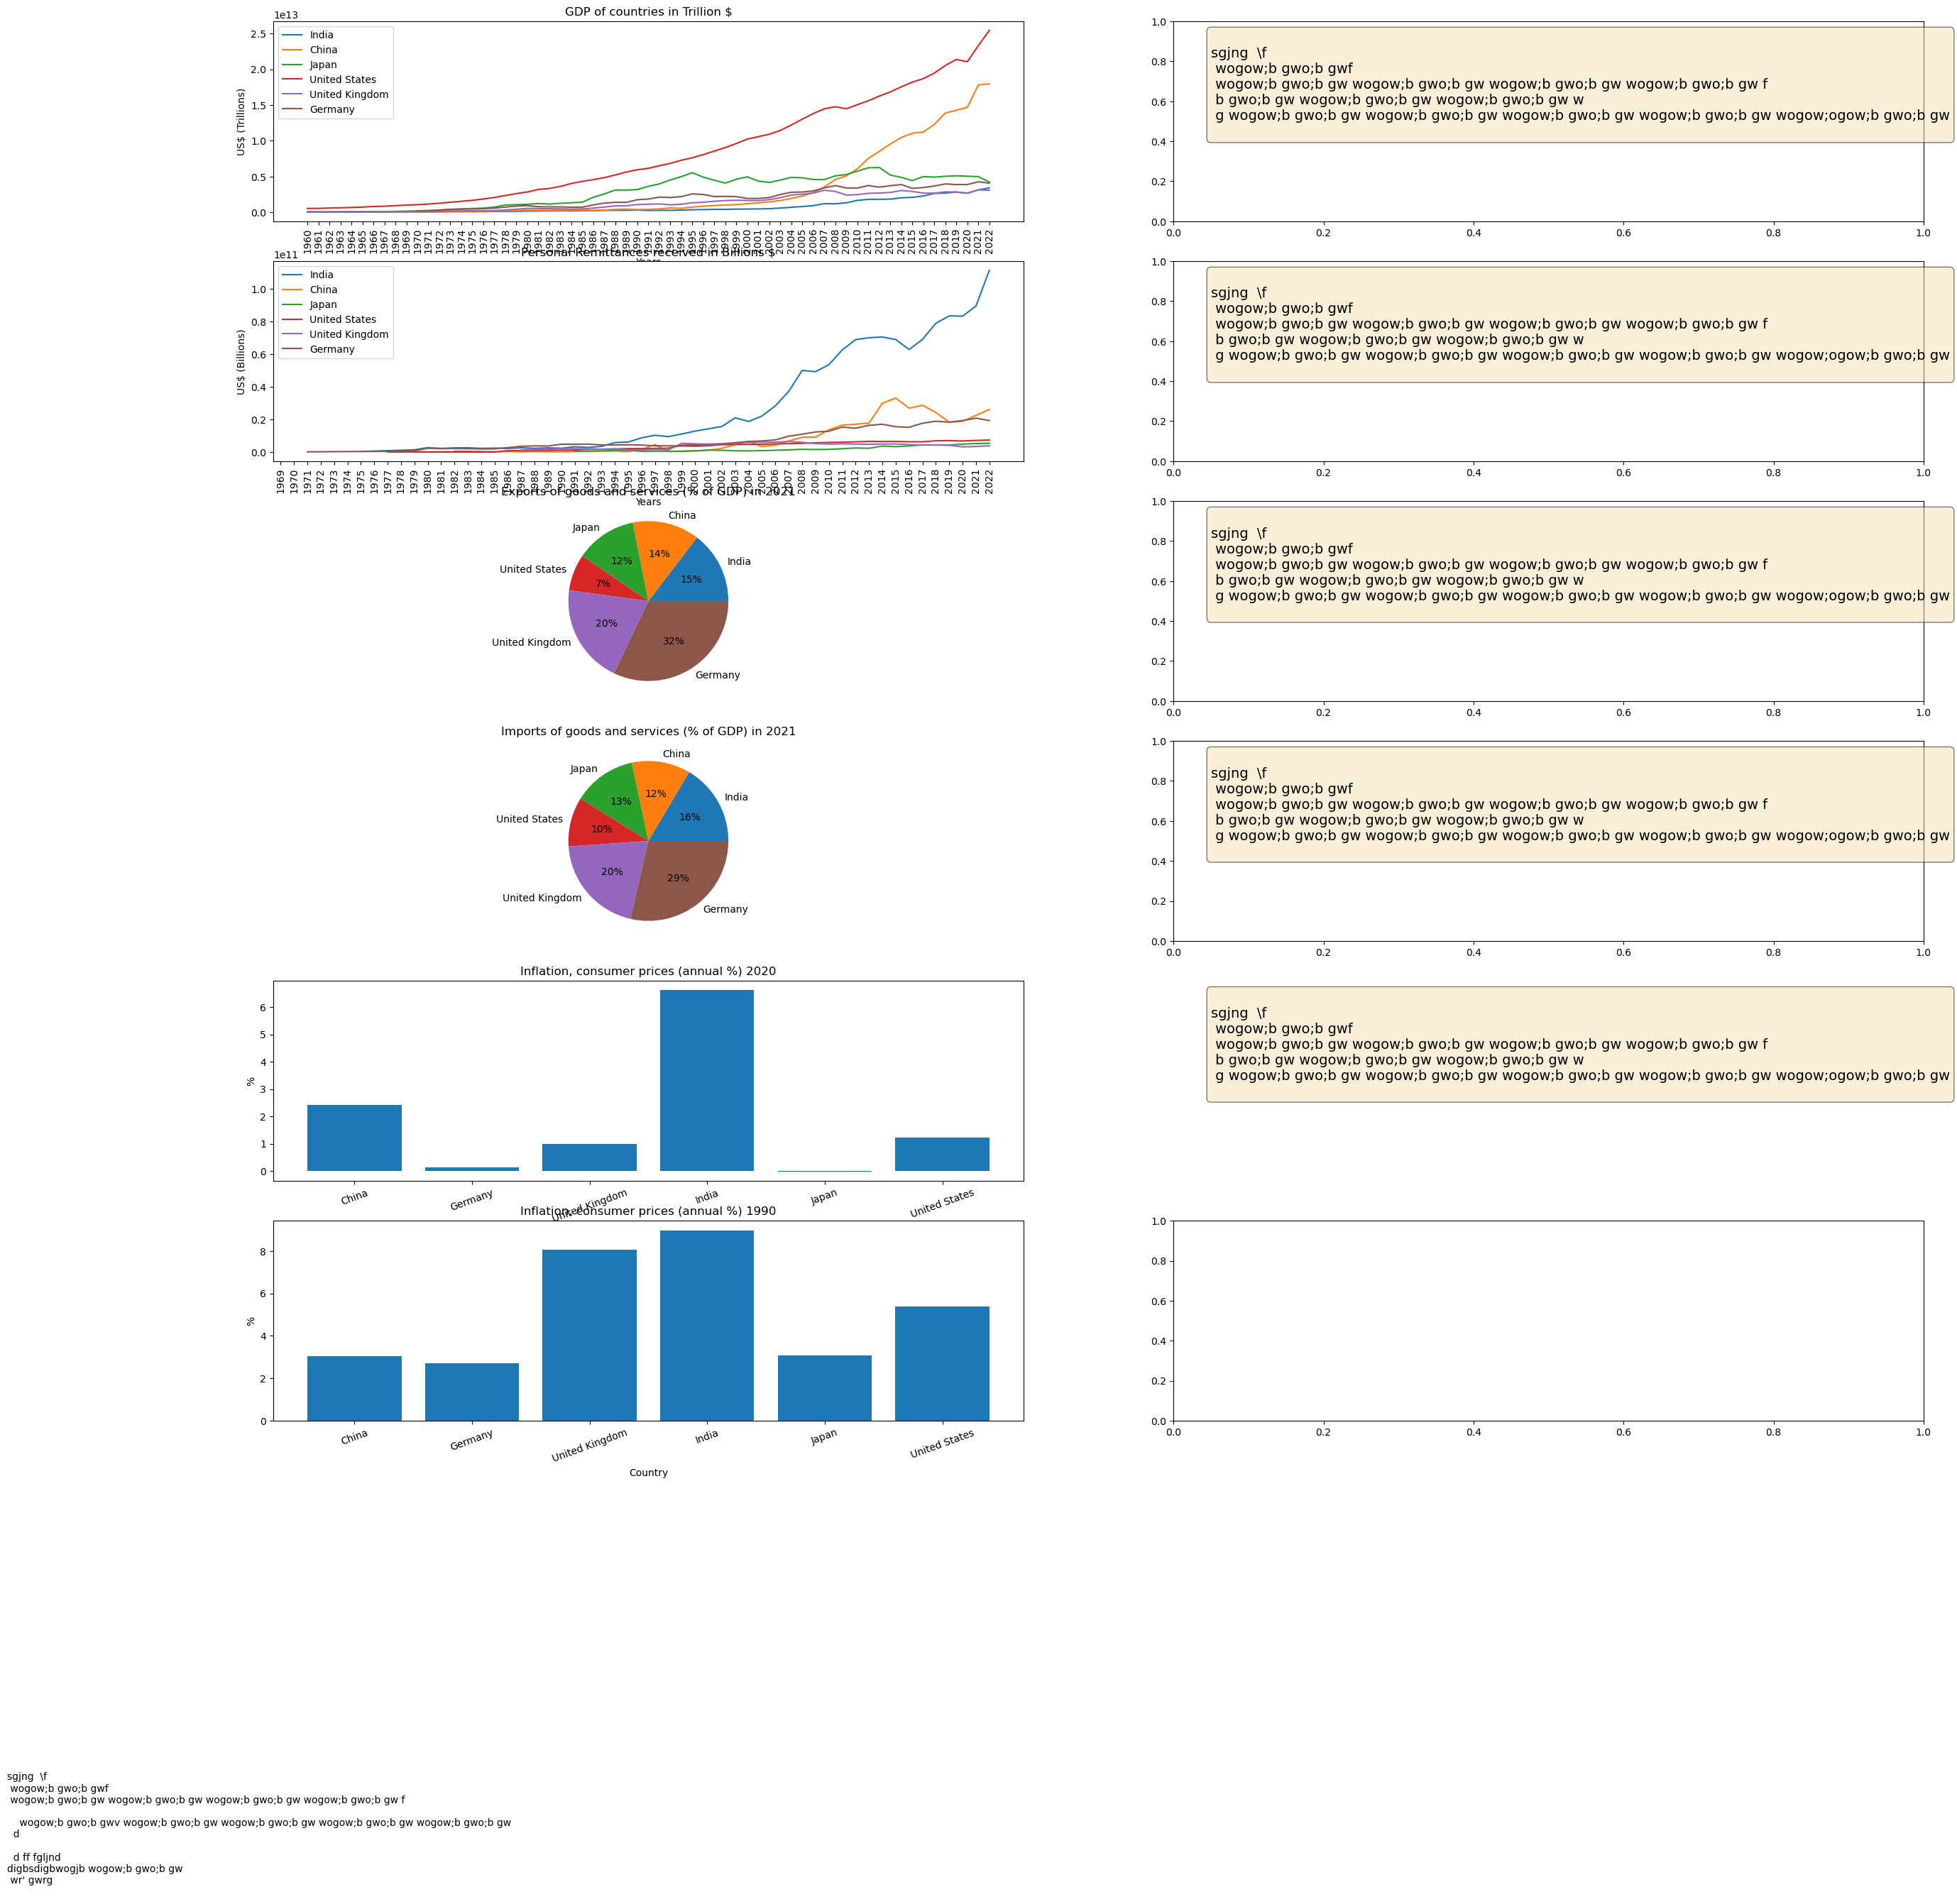

In [27]:
countries = ['India', 'China', 'Japan', 'United States', 'United Kingdom', 'Germany']

data, dataT = load_data(
    'economy_growth.csv',
    countries)

# gs = gridspec.GridSpec(3, 3)
# ax1 = plt.subplot(gs[25,:])

# fig1, ax = plt.subplots(7, 1, figsize = [25, 25]) 
plt.figure(figsize=[30,30])

plt.subplot(721)


# Create the first figure and axis
# fig1, ax1 = plt.subplots()

generate_line_plot(dataT, countries,
                   'GDP (current US$)',
                   "Years",
                   "US$ (Trillions)",
                   "GDP of countries in Trillion $"
                  )


plt.subplot(722)

# fig5, ax5 = plt.subplots(1,2)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

textstr = """
sgjng  \\f
 wogow;b gwo;b gwf
 wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw f 
 b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw w
 g wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;ogow;b gwo;b gw
 """
plt.text(0.05, 0.95, textstr, fontsize=14,bbox=props,verticalalignment='top')
# plt.tight_layout()


plt.subplot(723)

# Create the first figure and axis
# fig2, ax2 = plt.subplots()

# Generating a line plot of CO2 Emissions for the selected countries
generate_line_plot(dataT, countries,
                   'Personal remittances, received (current US$)',
                   "Years",
                   "US$ (Billions)",
                   "Personal Remittances received in Billions $",
                  )

plt.subplot(724)

textstr = """
sgjng  \\f
 wogow;b gwo;b gwf
 wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw f 
 b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw w
 g wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;ogow;b gwo;b gw
 """
plt.text(0.05, 0.95, textstr, fontsize=14,bbox=props,verticalalignment='top')
# plt.tight_layout()


plt.subplot(725)

# fig3, ax3 = plt.subplots(1,2)

# Creating a pie chart of an indicator for a selected country and year.
generate_pie_chart(
    dataT,
    2021,
    countries,
    'Exports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)'
)

plt.subplot(726)

textstr = """
sgjng  \\f
 wogow;b gwo;b gwf
 wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw f 
 b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw w
 g wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;ogow;b gwo;b gw
 """
plt.text(0.05, 0.95, textstr, fontsize=14,bbox=props,verticalalignment='top')


plt.subplot(727)

# Creating a pie chart of an indicator for a selected country and year.
generate_pie_chart(
    dataT,
    2021,
    countries,
    'Imports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)'
)

plt.subplot(728)

textstr = """
sgjng  \\f
 wogow;b gwo;b gwf
 wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw f 
 b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw w
 g wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;ogow;b gwo;b gw
 """
plt.text(0.05, 0.95, textstr, fontsize=14,bbox=props,verticalalignment='top')


plt.subplot(729)
# fig4, ax4 = plt.subplots(1,2)

# Generating barplot of popultion growth of countries in the year 2020
generate_bar_plot(
    data,
    2020,
    'Inflation, consumer prices (annual %)',
    image_name='population_growth_2020',
    title="Inflation, consumer prices (annual %) 2020"
)
plt.subplot(7,2,10)

textstr = """
sgjng  \\f
 wogow;b gwo;b gwf
 wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw f 
 b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw w
 g wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;ogow;b gwo;b gw
 """
plt.text(0.05, 0.95, textstr, fontsize=14,bbox=props,verticalalignment='top')
plt.axis('off')


plt.subplot(7,2,11)
# Generating barplot of popultion growth of countries in the year 1990
generate_bar_plot(
    data,
    1990,
    'Inflation, consumer prices (annual %)',
    image_name='population_growth_2020',
    title="Inflation, consumer prices (annual %) 1990"
)

plt.subplot(7,2,12)

# fig5, ax5 = plt.subplots(1,2)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

textstr = """
sgjng  \\f
 wogow;b gwo;b gwf
 wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw f 
   
    wogow;b gwo;b gwv wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw
  d 
  
  d ff fgljnd
digbsdigbwogjb wogow;b gwo;b gw
 wr' gwrg 
 """
 
plt.figtext(0, 0, textstr, fontsize = 10) 


# plt.text(0.05, 0.95, textstr, fontsize=14,bbox=props,verticalalignment='top')
# plt.tight_layout()


# plt.subplot(7,2,[13,14])

# # fig5, ax5 = plt.subplots(1,2)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# textstr = """
# sgjng  \\f
#  wogow;b gwo;b gwf
#  wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw f 
   
#     wogow;b gwo;b gwv wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw
#   d 
#     d 
  
#   d ff fgljnd
# digbsdigbwogj
#   d ff fgljnd
# digbsdigbwogjb wogow;b gwo;b gw
#  wr' gwrg 
#  """
 
    

# #   plt.text(0.05, 0.95, textstr, fontsize=14,bbox=props,verticalalignment='top')
# # plt.tight_layout()

# plt.subplots_adjust(top = 1.5)


plt.savefig('test.png', bbox_inches='tight',
                dpi=300)


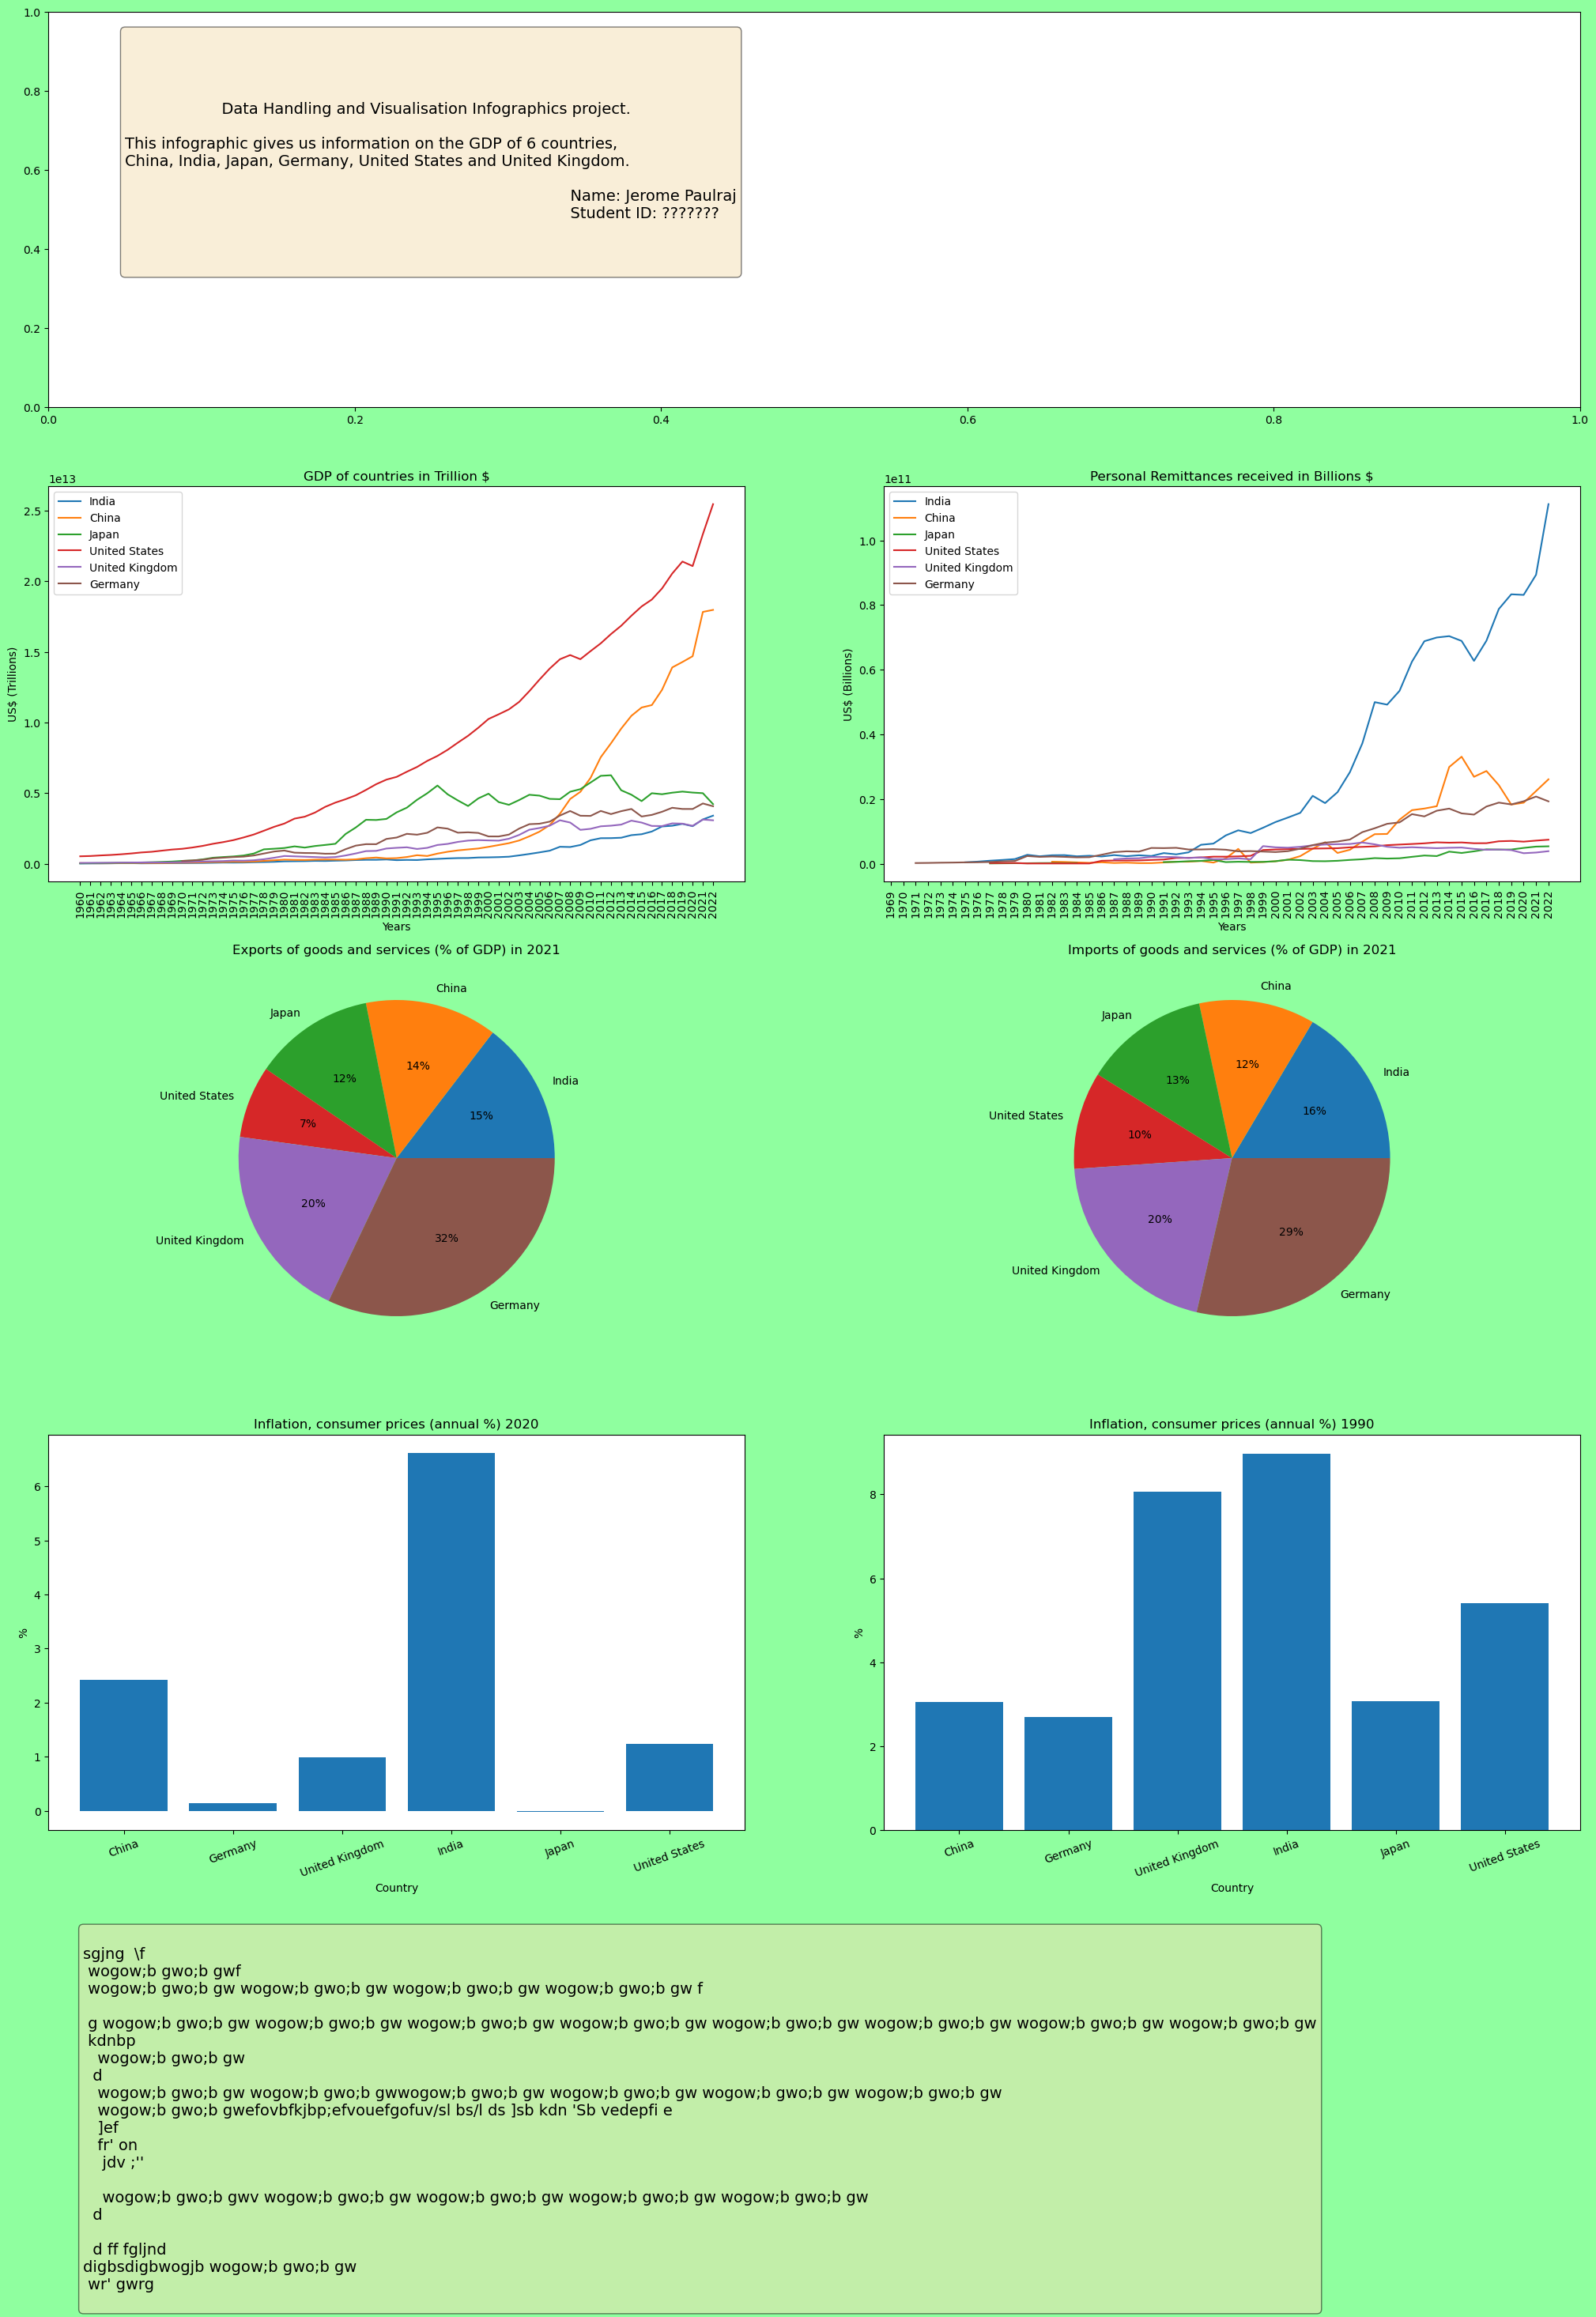

In [62]:
countries = ['India', 'China', 'Japan', 'United States', 'United Kingdom', 'Germany']

data, dataT = load_data(
    'economy_growth.csv',
    countries)

# gs = gridspec.GridSpec(3, 3)
# ax1 = plt.subplot(gs[25,:])

# fig1, ax = plt.subplots(7, 1, figsize = [25, 25]) 
fig = plt.figure(figsize=[25,25])

# plt.suptitle('Test Title - 22078325792', verticalalignment='top')

plt.subplot(711)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

textstr = """                                        
                     
                      
                       
                    Data Handling and Visualisation Infographics project. 

This infographic gives us information on the GDP of 6 countries,
China, India, Japan, Germany, United States and United Kingdom.

                                                                                            Name: Jerome Paulraj
                                                                                            Student ID: ???????

                                                                
 """

# plt.axis('off')
plt.text(0.05, 0.95, textstr, bbox=props,fontsize=14, va='top')


# plt.subplot(722)

# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# textstr = """
# Name: Jerome Paulraj
# Student ID: ???????
#  """

# plt.axis('off')
# plt.text(0.05, 0.95, textstr, fontsize=14,bbox=props,verticalalignment='center')


plt.subplot(723)


# Create the first figure and axis
# fig1, ax1 = plt.subplots()

generate_line_plot(dataT, countries,
                   'GDP (current US$)',
                   "Years",
                   "US$ (Trillions)",
                   "GDP of countries in Trillion $"
                  )


plt.subplot(724)

# Create the first figure and axis
# fig2, ax2 = plt.subplots()

# Generating a line plot of CO2 Emissions for the selected countries
generate_line_plot(dataT, countries,
                   'Personal remittances, received (current US$)',
                   "Years",
                   "US$ (Billions)",
                   "Personal Remittances received in Billions $",
                  )


plt.subplot(725)

# fig3, ax3 = plt.subplots(1,2)

# Creating a pie chart of an indicator for a selected country and year.
generate_pie_chart(
    dataT,
    2021,
    countries,
    'Exports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)'
)



plt.subplot(726)

# Creating a pie chart of an indicator for a selected country and year.
generate_pie_chart(
    dataT,
    2021,
    countries,
    'Imports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)'
)


plt.subplot(727)
# fig4, ax4 = plt.subplots(1,2)

# Generating barplot of popultion growth of countries in the year 2020
generate_bar_plot(
    data,
    2020,
    'Inflation, consumer prices (annual %)',
    image_name='population_growth_2020',
    title="Inflation, consumer prices (annual %) 2020"
)


plt.subplot(7,2,8)

# Generating barplot of popultion growth of countries in the year 1990
generate_bar_plot(
    data,
    1990,
    'Inflation, consumer prices (annual %)',
    image_name='population_growth_2020',
    title="Inflation, consumer prices (annual %) 1990"
)

plt.subplot(7,2,9)

# fig5, ax5 = plt.subplots(1,2)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

textstr = """
sgjng  \\f
 wogow;b gwo;b gwf
 wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw f 
 
 g wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw
 kdnbp 
   wogow;b gwo;b gw
  d 
   wogow;b gwo;b gw wogow;b gwo;b gwwogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw
   wogow;b gwo;b gwefovbfkjbp;efvouefgofuv/sl bs/l ds ]sb kdn 'Sb vedepfi e 
   ]ef 
   fr' on
    jdv ;''
   
    wogow;b gwo;b gwv wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw wogow;b gwo;b gw
  d 
  
  d ff fgljnd
digbsdigbwogjb wogow;b gwo;b gw
 wr' gwrg 
 """

# plt.figtext(0,0,textstr, fontsize = 10) 

plt.text(0.05, 0.95, textstr, fontsize=14,bbox=props,verticalalignment='top')
# plt.tight_layout()
plt.subplots_adjust(top = 1.75)

plt.axis('off')

fig.patch.set_facecolor('xkcd:mint green')


# plt.title('RfdsdS')

plt.savefig('test.png', bbox_inches='tight',
                dpi=300)
